# String
- represents sequence of chars
- "new" is not recommended (no interning)
- use `var a = "some text"` instead
  - _String interning_
  - JVM can optimize memory allocation 
  - single copy of each String literal in String Pool memory area
  - other variables reference this copy

In [1]:
char [] text = {'H', 'E', 'L', 'L', 'O'};   // own memory area
String a = new String(text);   // own memory area

### Interning

In [2]:
String x = "hi";
String y = "hi";
x == y // interned

true

In [3]:
String z = new String("hi");
x == z  // no interning due to using the constructor

false

In [4]:
String k = z.intern();   // "k" is a fresh copy as Strings are immutable
x == k  // interned

true

- strings are **immutable**
- `trim()`, `concat()`... always return fresh copy
- `concat()` and "+" operator are identical
- reassigning a new string to a variable
  - creates fresh allocation in string pool
  - old string stays in pool (possible other references) and is later cleaned by GC
- when concatinating with "+" then compiler might optimize via an invisible StringBuilder

In [5]:
// starting from index 0, *excluding* the upper boundary
"abcd".substring(2, 4)

cd

## Arithmitic vs. Concatination
- evaluation goes from left to right
- makes your mind go "boom"

In [6]:
String s = "";
1+1+"u"   // first 1+1 is calculated, then "u" is concatinated

2u

In [7]:
"u"+1+1 // concatination only

u11

In [8]:
"u"+(1+1)  // concat + calculate

u2

## Indexing


In [9]:
String a = "HelloWorld";
a.length()

10

<img src=attachment:image.png></img>
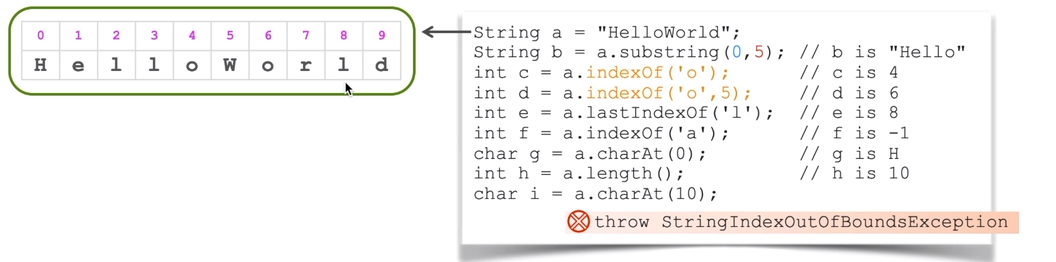

In [10]:
// char not preset
a.indexOf("-X")

-1

## StringBuilder
- similar to String but _mutable_
- modify particlar instance of String
- default capacity is 16, auto-expand if required
- rather an internal performance optimization
- _When someone uses StringBuilder, this is probably an older person ;-)_


In [11]:
StringBuilder a = new StringBuilder();
a.append("hello");
a.reverse();
a.insert(5, "!");
a

olleh!

In [12]:
a.capacity()

16

## Primitive Wrappers
<img src=attachment:image.png width=200></img>
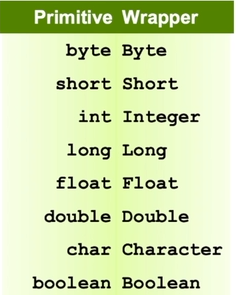

- primitives have no behaviour/ methods on them
- primitive > wrapper -> auto-boxing
- wrapper > primitive -> auto-unboxing

In [13]:
Integer b = Integer.valueOf(42);
b.intValue()

42

In [14]:
Double.valueOf("42.42")

42.42

#### Boundaries of a wrapped type

In [15]:
Short.MIN_VALUE

-32768

In [16]:
Short.MAX_VALUE

32767

In [17]:
Byte.MIN_VALUE

-128

In [18]:
Byte.MAX_VALUE

127

## BigDecimal
- handling decimal numbers with exact precision
- immutable
- arbitrary precision

In [19]:
BigDecimal price = BigDecimal.valueOf(12.99);
BigDecimal taxRate = BigDecimal.valueOf(0.2);
BigDecimal tax = price.multiply(taxRate);   // no operators but methods for calculation
tax

2.598

In [20]:
price.add(tax).setScale(2, RoundingMode.HALF_UP);

15.59

*Side note on Method Chaining*: Method needs to return new object

## Local Date and Time
- immutable
- helper methods create always new objects

| Class      | Description           | Example      | 
|------------|-----------------------|--------------|
| `java.time.LocalDate` |  Date with day, month, year | Birth date | 
| `java.time.LocalTime` | Time of day | Midnight | 
| `java.time.LocalDateTime`|  Day and time with no time zone| 10 a.m. next Monday  |
| `java.time.ZonedDateTime` | Date and time with a specific time zone | 9 a.m. EST on 2/20/2021 |


In [1]:
import java.time.*;

In [22]:
LocalDate.now()

2021-03-12

In [6]:
// use MONTH enum for readybility
LocalDate.of(2019, Month.JUNE, 5)

2019-06-05

In [5]:
var a = LocalDateTime.of(2019, 11, 1, 12, 30, 0);
a

2019-11-01T12:30

In [24]:
System.out.printf("%s - %s\n", a.toLocalDate(), a.toLocalTime());

2019-11-01 - 12:30


java.io.PrintStream@43bed6ad

In [25]:
// overwrite time
a.withYear(2021);

2021-11-01T12:30

## Instants, Durations and Periods
- `Duration` - amount of time in nano seconds
- `Period` - units like days or years
- `Instant` - timestamp

### Instant from JavaDoc
_An instantaneous point on the time-line.
This class models a single instantaneous point on the time-line. This might be used to record event time-stamps in the application._

_The range of an instant requires the storage of a number larger than a long. To achieve this, the class stores a long representing epoch-seconds and an int representing nanosecond-of-second, which will always be between 0 and 999,999,999. The epoch-seconds are measured from the standard Java epoch of 1970-01-01T00:00:00Z where instants after the epoch have positive values, and earlier instants have negative values. For both the epoch-second and nanosecond parts, a larger value is always later on the time-line than a smaller value._

In [26]:
Instant.now()

2021-03-12T09:39:45.081479Z

In [27]:
Instant.now().getEpochSecond();

1615541985

In [28]:
Instant.now().getNano()

231896000

In [29]:
// 2 h distance (positive)
Duration d = Duration.between(LocalDateTime.now(), LocalDateTime.now().plusHours(2));
d

PT2H0.000026S

In [30]:
// 4 h distance (negative)
Duration d = Duration.between(LocalDateTime.now().plusHours(4), LocalDateTime.now());
d

PT-3H-59M-59.999967S

In [31]:
d.toMinutes()

-240

In [32]:
d.toMinutesPart()

0

## Zoned Date Time
- tigh timestamp to specific zone
- represent date + time according to time zone rules
- similar API like LocalDateTime
- additional time zone specific operations like `withZoneSameInstant`
- handles daylight saving time + time zone differences

In [33]:
ZoneId london = ZoneId.of("Europe/London");
LocalDateTime someTime = LocalDateTime.of(2010, 1, 1, 1, 0, 0);
ZonedDateTime londonTime = ZonedDateTime.of(someTime, london);
londonTime

2010-01-01T01:00Z[Europe/London]

In [34]:
ZonedDateTime newYorkTime = londonTime.withZoneSameInstant(ZoneId.of("America/New_York"));
newYorkTime

2009-12-31T20:00-05:00[America/New_York]

## Localisation
- by default Java assumes ISO calender
- standards
    - ISO 639 language
    - ISO 3166 country codes
    - UN M.40 area codes
    
<img src=attachment:image.png width=400></img>
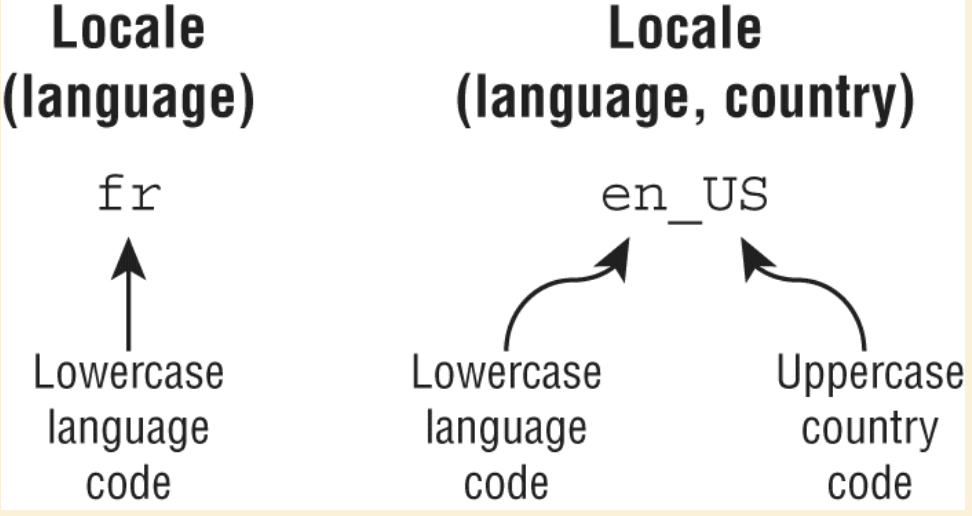

In [28]:
Locale.getDefault()

en_US

In [35]:
Locale.setDefault(Locale.GERMANY)

In [31]:
// via constant
Locale.GERMAN

de

In [30]:
Locale.GERMANY

de_DE

In [32]:
// via constructor
new Locale("en", "GB")

en_GB

In [36]:
new Locale("fr", "029")  // French Caribbean - area code

fr_029

In [34]:
// via builder
new Locale.Builder()
    .setLanguage("en")
    .setRegion("GB")
    .build();

en_GB

In [37]:
// https://en.wikipedia.org/wiki/IETF_language_tag
// this represents Swiss German (Schweitzerdeutsch)
Locale.forLanguageTag("gsw-u-sd-chzh")

gsw__#u-sd-chzh

In [38]:
import java.text.MessageFormat;

// nice, another build in string templating variant
MessageFormat.format("Hello {0}, hello {1}. You both are {2}", "Peter", "Klaus", 42.42)

Hello Peter, hello Klaus. You both are 42.42

## NumberFormat Based On Locale

| Description          | Using default Locale and a specified Locale                           |
|----------------------|-----------------------------------------------------------------------|
| A general‐purpose formatter | `NumberFormat.getInstance()` `NumberFormat.getInstance(locale)`|
| Same as getInstance |`NumberFormat.getNumberInstance()` `NumberFormat.getNumberInstance(locale)` |
| For formatting monetary amounts | `NumberFormat.getCurrencyInstance()` `NumberFormat.getCurrencyInstance(locale)`|
|For formatting percentages | `NumberFormat.getPercentInstance()` `NumberFormat.getPercentInstance(locale)` |    |Rounds decimal values before displaying | `NumberFormat.getIntegerInstance()` `NumberFormat.getIntegerInstance(locale)` |

In [53]:
import java.text.*;

BigDecimal price = BigDecimal.valueOf(2.99);
Double tax = 0.2;
int quantity = 42;
Locale locale = new Locale("de", "DE");

NumberFormat currencyFormat = NumberFormat.getCurrencyInstance(locale);
NumberFormat percentageFormat = NumberFormat.getPercentInstance(locale);
NumberFormat numberFormat = NumberFormat.getNumberInstance(locale);

In [40]:
String formattedPrice = currencyFormat.format(price);
formattedPrice;

2,99 €

In [41]:
String formattedTax = percentageFormat.format(tax);
formattedTax;

20 %

In [42]:
String formattedQuantity = numberFormat.format(quantity);
formattedQuantity;

42

#### Parse
- `parse()` returns `Number` and thus can be casted to numeric primitive wrappers or `BigDecimal`

In [51]:
var euroCurrencyFormat = NumberFormat.getCurrencyInstance(Locale.FRANCE);

// TODO still not parsing
// (BigDecimal)euroCurrencyFormat.parse("2,00 €");
//newPrice

### Own Number Format using DecimalFormat
- `#` - Omit the position if no digit exists for it.
- `0`- Put a 0 in the position if no digit exists for it

In [55]:
double d = 1234567.467;
NumberFormat f1 = new DecimalFormat("###,###,###.0");
f1.format(d)

1.234.567,5

### Format and Parse Date and Time


In [7]:
import java.time.format.*;

DateTimeFormatter formatter = DateTimeFormatter.ofPattern("EEEE dd MMM yyyy", Locale.GERMANY);
LocalDateTime.now().format(formatter);

Sonntag 11 Apr. 2021

In [21]:
// local short-style format via FormatStyle
DateTimeFormatter formatter = DateTimeFormatter.ofLocalizedDate(FormatStyle.SHORT).localizedBy(Locale.GERMANY);
LocalDateTime.now().format(formatter);

11.04.21

### 2 Formatter Methods

In [23]:
var dateTime = LocalDateTime.of(2020, Month.OCTOBER, 20, 6, 15, 30);
var formatter = DateTimeFormatter.ofPattern("MM/dd/yyyy hh:mm:ss");

// two formatter methods
System.out.println(dateTime.format(formatter));
System.out.println(formatter.format(dateTime));

10/20/2020 06:15:30
10/20/2020 06:15:30


### Adding Text
- escape via single quotes

In [26]:
var dt = LocalDateTime.of(2020, Month.OCTOBER, 20, 6, 15, 30);
// -------------------------------------------------+
//                                                  v
var f = DateTimeFormatter.ofPattern("MMMM dd, yyyy 'at' hh:mm");
dt.format(f)

October 20, 2020 at 06:15

### Predefined Formatters

In [12]:
ZonedDateTime.now().format(DateTimeFormatter.ISO_OFFSET_DATE_TIME)

2021-04-11T20:21:50.24338Z

In [15]:
ZonedDateTime.now().format(DateTimeFormatter.RFC_1123_DATE_TIME)

Sun, 11 Apr 2021 20:23:16 GMT

### Finer-Grained Locale
- formatting options are subdivided into distinct categories
- can be controlled with `Locale.Category`

`Locale.Category` values
- `DISPLAY` - for displaying data about the locale
- `FORMAT` formatting dates, numbers, or currencies

In [58]:
public static void printCurrency(Locale locale, double money) {
    System.out.println(NumberFormat.getCurrencyInstance()
        .format(money) + ", " + locale.getDisplayLanguage());
}

var money = 1.23;
var spain = new Locale("es", "ES");

Locale.setDefault(Locale.US);
printCurrency(spain, money)

$1.23, Spanish


In [61]:
// mix of us and es
Locale.setDefault(Locale.Category.DISPLAY, spain);
printCurrency(spain, money);

1,23 €, español


In [60]:
Locale.setDefault(Locale.Category.FORMAT, spain);
printCurrency(spain, money);

1,23 €, español


### Trickery

In [56]:
// runtime exception when formatter and time do not match
LocalDateTime.now().format(DateTimeFormatter.ISO_OFFSET_DATE_TIME)

EvalException: Unsupported field: OffsetSeconds

### Legacy Formatting

In [20]:
import java.util.Date;
import java.text.DateFormat;
import java.text.SimpleDateFormat;

DateFormat s = new SimpleDateFormat("MMMM dd, yyyy 'at' hh:mm");
s.format(new Date());

April 11, 2021 at 08:27

### Common Symbols

| Symbol | Meaning   |Examples  |
|--------|-----------|----------|
| y   |Year  |20, 2020  |
|M | Month | 1, 01, Jan, January  |
|d | Day | 5, 05   |
|h | Hour | 9, 09   |
|m | Minute  | 45   |
| s | Second | 52    |
|a | a.m./p.m. | AM, PM |
|z | Time Zone Name | Eastern Standard Time, EST|
|Z  |Time Zone Offset | ‐0400 |

Supported date/time symbols     

| Symbol | LocalDate  | LocalTime |  LocalDateTime |  ZonedDateTime |
|--------|------------|------------|-----------------|---------------|
|  y     |√           |             | √              |√  |
|  M     |√           |            | √              |√  | 
|  d     |√           |            | √              | √  |  
|  h     |            | √          |√               | √   |
|  m     |            | √          | √              |√   |
|s       |            |    √       |√              | √  |
| a      |            | √          |√              |√   |
|z       |            |            |               |  √  
| Z      |            |            |               |   √  |


## Localizable Resources
- plain text files with _.properties_ extension
- key value pairs
- loading switches via the locale provided
- default properties files does not need to be English
- on missing key in specific bundle, key of default bundle is used
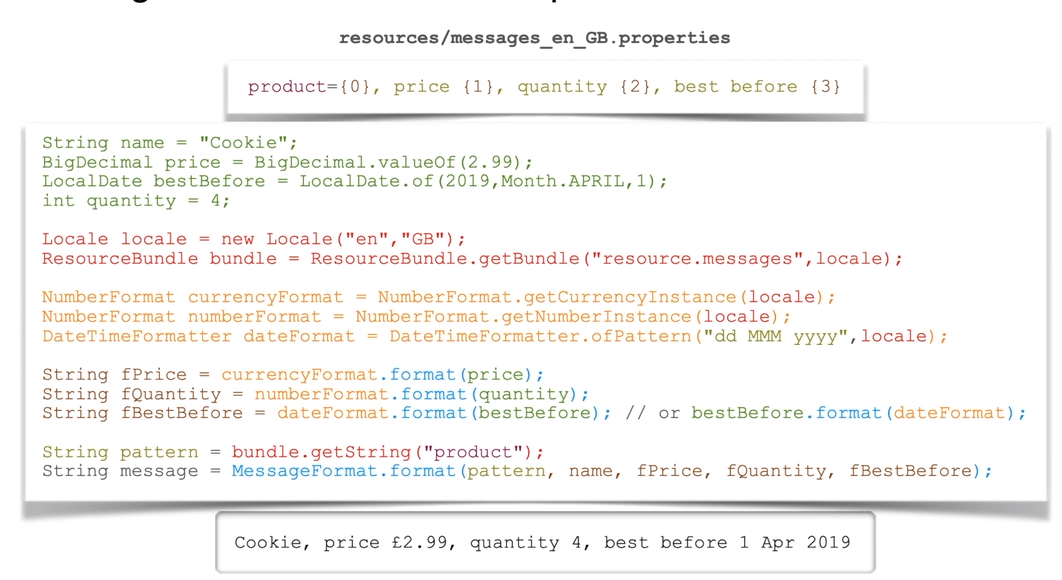

### Resource Bundle Lookup Order
|Step  |Looks for file                       | Reason       |
|------|-------------------------------------|--------------|
|1     | `Zoo_fr_FR.properties`              | The requested locale |
|2     | `Zoo_fr.properties`                 | The language we requested with no country |
|3     | `Zoo_en_US.properties`              | The default locale |
|4     | `Zoo_en.properties`                 | The default locale's language with no country  
|5     | `Zoo.properties`                    | No locale at all—the default bundle |
|6     | If still not found, throw `MissingResourceException`.| No locale or default bundle available  |

### Merging Keys Of Property Files
- keys can come from different ressource bundles
- can be loaded from any parent in the hierarchy
- parent = remove components of the name

| Matching resource bundle | Properties files keys can come from  |
|--------------------------|--------------------------------------|
| `Zoo_fr_FR`| `Zoo_fr_FR.properties` `Zoo_fr.properties` `Zoo.properties` |

In [83]:
import java.util.ListResourceBundle;

public class MyClassBundle extends ListResourceBundle {

    @Override
    protected Object[][] getContents() {
        return contents;
    }

    private Object[][] contents = {
            { "hello"   , "tach" },
            { "currency", "EUR" },
    };
}

In [84]:
var rb = new MyClassBundle();
rb.keySet().stream().forEach(it -> System.out.println(it + ":" + rb.getString(it)))

currency:EUR
hello:tach


## Properties Object

In [85]:
var props = new Properties();
props.setProperty("name", "Our zoo");
props.setProperty("open", "10am");

props.getProperty("open")

10am

In [95]:
// returns null
props.getProperty("not existing")